In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# we want our plots to appear inside notebook
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
 df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

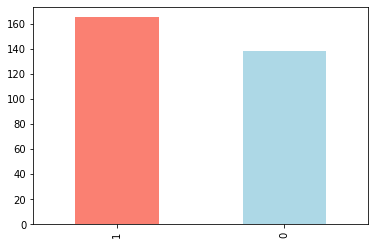

In [4]:
 df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


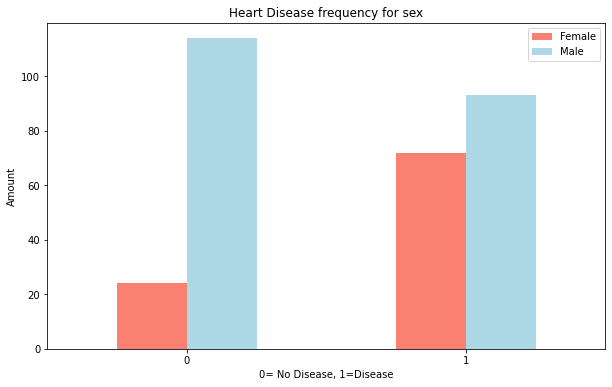

In [7]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease frequency for sex")
plt.xlabel("0= No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);
# To align 0 and 1 vertically in the x axis

## Age vs Max heart rate for heart disease

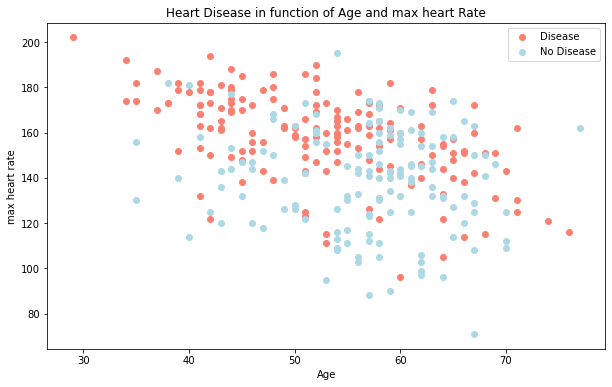

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# scatter with negative examples

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart Disease in function of Age and max heart Rate")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend(["Disease","No Disease"])

<AxesSubplot:ylabel='Frequency'>

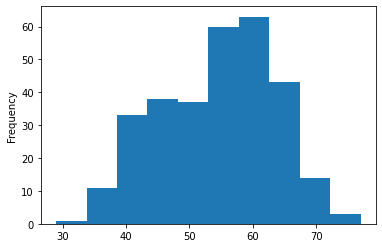

In [9]:
# check the distribution of age column with a hsitogram

df.age.plot.hist()

(14.5, -0.5)

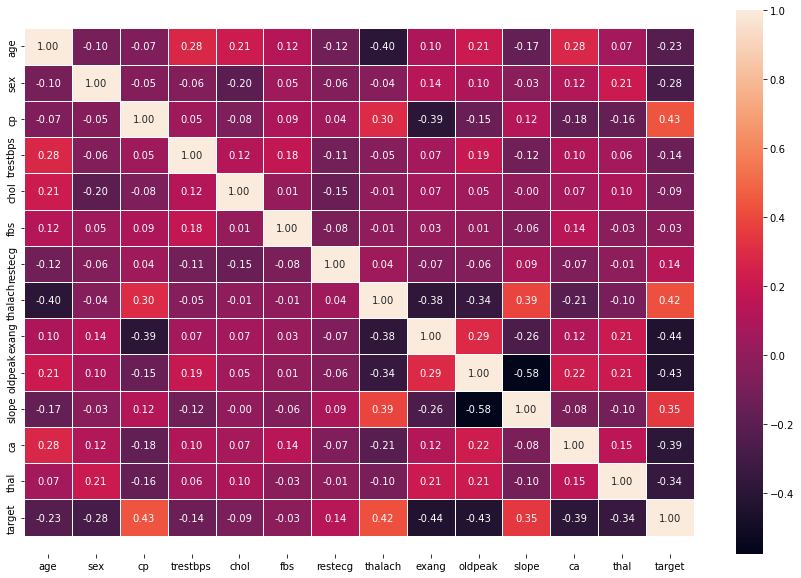

In [10]:
#Correlation matrix
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,
               linewidths=0.5,
               fmt=".2f");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [11]:
# split data into x and y
x=df.drop("target", axis=1)
y=df["target"]
#split into train and test sets
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



we will try three machine learning models
1.Logistic Regression
2.K-Nearest neighbour classifier
3.Random forest Classifier


In [12]:
#put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "random Forest": RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
     Fits and evaluates given machine learning models.
     models: a dict of different Scikit-learn machine learning models
    """
    np.random.seed(0)
    #make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
    

In [13]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\haris\Desktop\disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'random Forest': 0.8852459016393442}

## Model comparison


<AxesSubplot:>

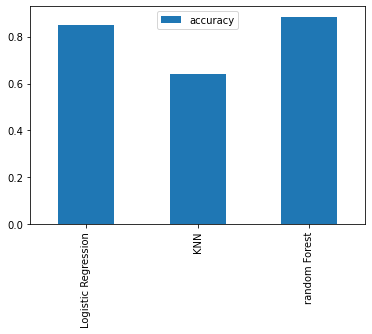

In [14]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

### Hyper parameter Tuning



In [15]:

train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))

    test_scores.append(knn.score(x_test,y_test))


In [16]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [17]:
test_scores

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


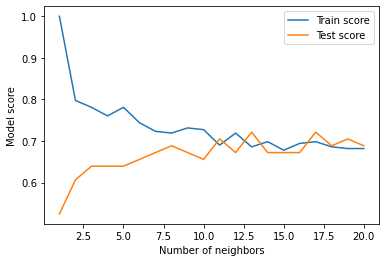

In [18]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyper parameter tuning using Randomized search cv
we are going to tune:
* Logistic regression()
* RandomForestClassifier()

In [26]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]
             }
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
    
    
}

In [27]:
np.random.seed(0)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                             )

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [29]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [30]:
np.random.seed(7)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                         n_iter=20,
                         verbose=True
                        )

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [32]:
rs_rf.score(x_test,y_test)

0.8524590163934426

## Hyper parameter tuning GridSearchCV


In [37]:
log_reg_grid={"C": np.logspace(-4,4,30),
              "solver": ["liblinear"]}

             
gs_log_reg=GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

### Evaluating our tuned machine learning classifier

In [40]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

C:\Users\haris\Desktop\disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


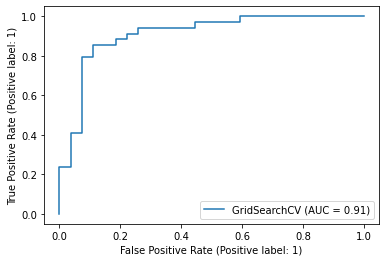

In [41]:
plot_roc_curve(gs_log_reg,x_test,y_test)

In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
gs_log_reg.best_params_


{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [45]:
#Create a new classifier with best parameters
clf=LogisticRegression(C= 1.3738237958832638,
                      solver="liblinear")


In [46]:

cv_acc=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [47]:
np.mean(cv_acc)

0.8215300546448088

In [48]:
cv_precision=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.817900063251107

In [49]:
cv_recall=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [50]:
cv_f1=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

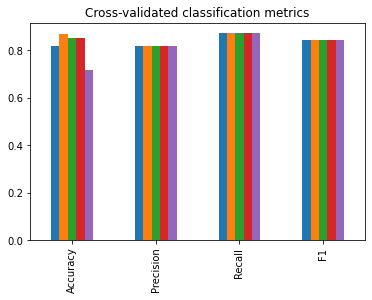

In [58]:
#Visualize cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1": cv_f1},
                         
                       )
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

## Feature importance
Feature importance is another as asking, "Which features contributed most to theoutcomes of the model and how did they contribute?"

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
gs_log_reg.best_params_

clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [63]:
clf.coef_

array([[ 0.00675716, -1.58501623,  0.75550407, -0.00844702, -0.00395711,
        -0.34333667,  0.2310589 ,  0.02937547, -0.85956312, -0.5392621 ,
         0.21350811, -0.86555906, -0.69226802]])

In [64]:
#Match coef's of features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006757159525962896,
 'sex': -1.5850162318287058,
 'cp': 0.7555040679411457,
 'trestbps': -0.008447016080718038,
 'chol': -0.003957110835767478,
 'fbs': -0.3433366690491958,
 'restecg': 0.2310588950130593,
 'thalach': 0.029375472738582164,
 'exang': -0.8595631249896559,
 'oldpeak': -0.5392620963262986,
 'slope': 0.21350810571717108,
 'ca': -0.8655590599035643,
 'thal': -0.692268017305102}

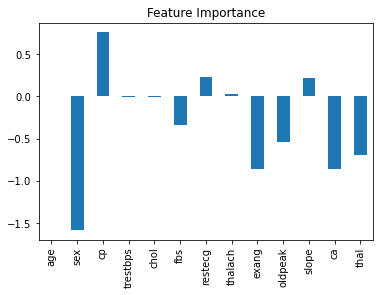

In [66]:
#Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);